In [101]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import datetime as dt
import warnings

In [75]:
df = pd.read_csv('sns_df.csv', sep=',',parse_dates=['Acquisition_Time'])
df

,Unnamed: 0,Acquisition_Time,Hospital,Urgency_Type,Service,Emergency_Stage,Waiting_Time,People_Waiting,H_Name
0,0,2017-11-15 00:01:10,211,Urgncia Polivalente,Espera: Medicina Interna,4,17,0,S Jose
1,1,2017-11-15 00:01:10,211,Urgncia Polivalente,Espera: Medicina Interna,3,34,0,S Jose
2,2,2017-11-15 00:01:10,211,Urgncia Polivalente,Espera: Cirurgia Geral,3,6,0,S Jose
3,3,2017-11-15 00:01:10,211,Urgncia Polivalente,Espera: Oftalmologia,3,5,0,S Jose
4,4,2017-11-15 00:01:10,211,Urgncia Polivalente,Espera: Medicina Interna,2,309,8,S Jose
...,...,...,...,...,...,...,...,...,...
1603379,1603417,2019-04-29 23:59:41,218,Urgncia Central,Medicina,4,13,0,Santa Maria
1603380,1603418,2019-04-29 23:59:41,218,Urgncia Central,Cirurgia,3,10,0,Santa Maria
1603381,1603419,2019-04-29 23:59:41,218,Urgncia Central,Medicina,3,53,13,Santa Maria
1603382,1603420,2019-04-29 23:59:41,218,Urgncia Central,Cirurgia,2,52,1,Santa Maria


In [76]:
df_plot=df[['Acquisition_Time','H_Name','Service','Waiting_Time','People_Waiting','Emergency_Stage']]
df_plot

,Acquisition_Time,H_Name,Service,Waiting_Time,People_Waiting,Emergency_Stage
0,2017-11-15 00:01:10,S Jose,Espera: Medicina Interna,17,0,4
1,2017-11-15 00:01:10,S Jose,Espera: Medicina Interna,34,0,3
2,2017-11-15 00:01:10,S Jose,Espera: Cirurgia Geral,6,0,3
3,2017-11-15 00:01:10,S Jose,Espera: Oftalmologia,5,0,3
4,2017-11-15 00:01:10,S Jose,Espera: Medicina Interna,309,8,2
...,...,...,...,...,...,...
1603379,2019-04-29 23:59:41,Santa Maria,Medicina,13,0,4
1603380,2019-04-29 23:59:41,Santa Maria,Cirurgia,10,0,3
1603381,2019-04-29 23:59:41,Santa Maria,Medicina,53,13,3
1603382,2019-04-29 23:59:41,Santa Maria,Cirurgia,52,1,2


In [77]:
df_plot['Weekday'] = df_plot['Acquisition_Time'].dt.weekday
df_plot['Year'] = df_plot['Acquisition_Time'].dt.year

C:\Users\gonçalo\AppData\Local\Temp\ipykernel_11232\1044734689.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gonçalo\AppData\Local\Temp\ipykernel_11232\1044734689.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [302]:
hospital_s_jose = df_plot.loc[df['H_Name'] == 'S Jose']
hospital_s_maria = df_plot.loc[df['H_Name'] == 'Santa Maria']
hospital_s_xavier = df_plot.loc[df['H_Name'] == 'SFX']
hospital_estefania = df_plot.loc[df['H_Name'] == 'Estefania']

In [91]:
def encoder(hospital):
    enc = preprocessing.OneHotEncoder()
    enc.fit(hospital[['Service']])
    enc.categories_
    one_hot = enc.transform(hospital[['Service']]).toarray()
    
    hospital[hospital['Service'].unique()] = one_hot

    return hospital

In [105]:
encoder(hospital_s_jose)
encoder(hospital_s_maria)
encoder(hospital_s_xavier)
encoder(hospital_estefania)
warnings.simplefilter('ignore')

In [6]:
all_services_test=[]
all_services_test.append(hospital_s_jose['Service'].unique())
all_services_test.append(hospital_s_maria['Service'].unique())
all_services_test.append(hospital_s_xavier['Service'].unique())
all_services_test.append(hospital_estefania['Service'].unique())

services_list=[]

for i in all_services_test:
    for s in i:
        if s not in services_list:
            services_list.append(s)
        else:
            pass
        
services_list

['Espera: Medicina Interna',
 'Espera: Cirurgia Geral',
 'Espera: Oftalmologia',
 'Espera: Ortopedia',
 'Espera: Otorrinolaringologia',
 'Espera: Pequena Cirurgia',
 'Aguarda Balcao (Medico)',
 'Aguarda Balcao Trauma',
 'Aguarda Sector Ortopedico',
 'Aguarda Cirurgia Plastica',
 'Aguarda Atendimento Geral',
 'Espera por 1 observacao medica',
 'Aguarda Sector Psiquiatria',
 'Aguarda Pequena Cirurgia Geral',
 'Aguarda Balcao (Cirurgia)',
 'Cirurgia',
 'Medicina',
 'Espera: Pediatria',
 'Espera: Cirurgia',
 'Espera: Otorrino',
 'Sala de Espera Pos-Triagem',
 'Aguardar Vaga/ECO/CTG/ Terapeutica',
 'Bloco de Partos']

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

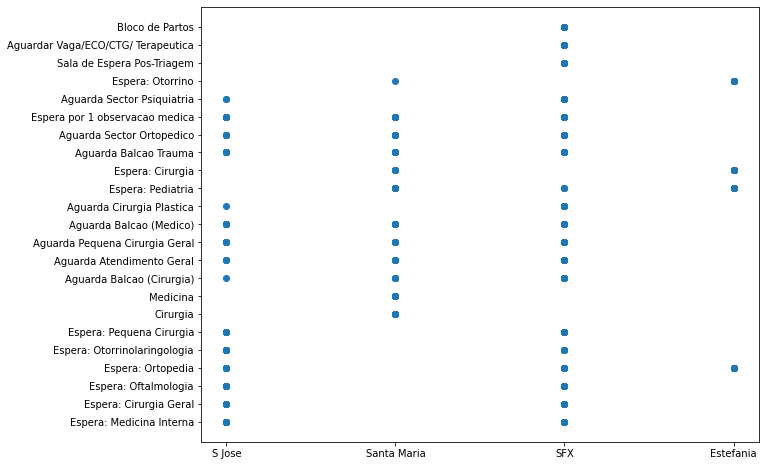

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(df['H_Name'],df['Service'])
plt.xticks(rotation = 0)

In [238]:
def corr(hospital):
    h = hospital.corr()
    h = h.dropna(how='all')
    h.dropna(axis = 1, how ='all', inplace = True)
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(h.corr(), cmap='Reds', annot=True)
    plt.title('Correlation Matrix');
    

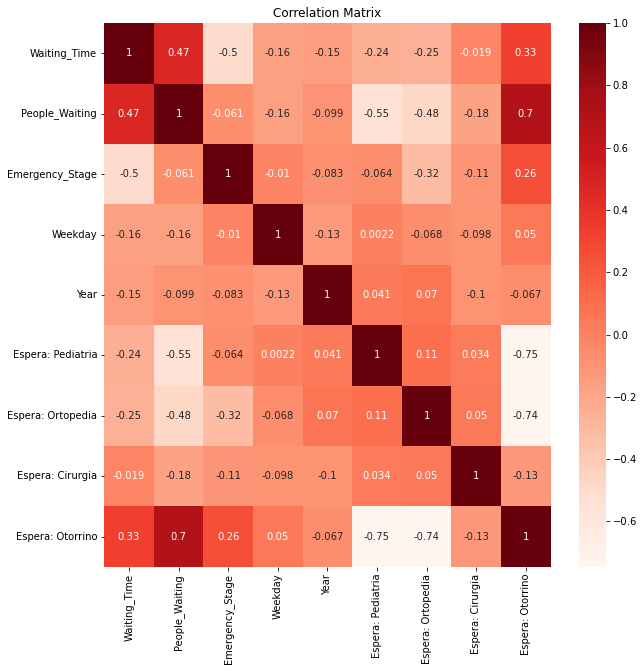

In [239]:
corr(hospital_estefania)

In [27]:
def rmse(targets,predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [29]:
def try_parameters(hospital,w, b):
    fig = px.scatter_3d(hospital[['Emergency_Stage','Waiting_Time','Weekday']], x='Emergency_Stage', y='Weekday', z='Waiting_Time')
    fig.update_traces(marker_size=3, marker_opacity=0.5)
    
    fig.show()

In [240]:
warnings.simplefilter('ignore')

h = hospital_estefania[hospital_estefania['Weekday'] == 0]

nan_value = float("NaN")
h.replace(0, nan_value, inplace=True)
h.dropna(how='all', axis=1, inplace=True)
h.replace(nan_value, 0, inplace=True)

h_numeric_columns= ['Waiting_Time','People_Waiting']
scaler = StandardScaler()
scaler.fit(h[h_numeric_columns])
scaler.mean_
scaler.var_

scaled_inputs = scaler.transform(h[h_numeric_columns])
scaled_inputs

array([[-0.59839114, -0.45361805],
       [-0.62210911, -0.79088316],
       [ 0.20801978,  2.24450279],
       ...,
       [-0.00544193,  0.55817726],
       [-0.07659584,  0.22091216],
       [ 0.77725102,  1.90723769]])

In [314]:
warnings.simplefilter('ignore')

h = hospital_estefania[hospital_estefania['Weekday'] == 0]

nan_value = float("NaN")
h.replace(0, nan_value, inplace=True)
h.dropna(how='all', axis=1, inplace=True)
h.replace(nan_value, 0, inplace=True)

h_array = hospital_estefania['Service'].unique()
h_array = np.append(h_array,'Emergency_Stage')

inputs, targets = h[h_array],h[['Waiting_Time']]
model = LinearRegression().fit(inputs,targets)

predictions=model.predict(inputs)
print(predictions)
print(rmse(targets,predictions))

KeyError: "['Espera: Pediatria', 'Espera: Ortopedia', 'Espera: Cirurgia', 'Espera: Otorrino'] not in index"

In [315]:
def regressor_estimator(hospital):
    hospital = hospital_s_jose
    try:
        warnings.simplefilter('ignore')

        h = hospital[hospital['Weekday'] == 0]

        nan_value = float("NaN")
        h.replace(0, nan_value, inplace=True)
        h.dropna(how='all', axis=1, inplace=True)
        h.replace(nan_value, 0, inplace=True)

        h_array = hospital['Service'].unique()
        h_array = np.append(h_array,'Emergency_Stage')
        print(h_array)

        inputs, targets = h[h_array],h[['Waiting_Time']]
        model = LinearRegression().fit(inputs,targets)

        predictions=model.predict(inputs)
        print(predictions)
        print(rmse(targets,predictions))
        
    except Exception as e:
        print(e)

In [304]:
regressor_estimator(hospital_estefania)

['Espera: Medicina Interna' 'Espera: Cirurgia Geral'
 'Espera: Oftalmologia' 'Espera: Ortopedia' 'Espera: Otorrinolaringologia'
 'Espera: Pequena Cirurgia' 'Aguarda Balcao (Medico)'
 'Aguarda Balcao Trauma' 'Aguarda Sector Ortopedico'
 'Aguarda Cirurgia Plastica' 'Aguarda Atendimento Geral'
 'Espera por 1 observacao medica' 'Aguarda Sector Psiquiatria'
 'Aguarda Pequena Cirurgia Geral' 'Aguarda Balcao (Cirurgia)'
 'Emergency_Stage']
"['Espera: Medicina Interna', 'Espera: Cirurgia Geral', 'Espera: Oftalmologia', 'Espera: Ortopedia', 'Espera: Otorrinolaringologia', 'Espera: Pequena Cirurgia', 'Aguarda Balcao (Medico)', 'Aguarda Balcao Trauma', 'Aguarda Sector Ortopedico', 'Aguarda Cirurgia Plastica', 'Aguarda Atendimento Geral', 'Espera por 1 observacao medica', 'Aguarda Sector Psiquiatria', 'Aguarda Pequena Cirurgia Geral', 'Aguarda Balcao (Cirurgia)'] not in index"


In [237]:
input_cols = ['Espera: Pediatria','Espera: Ortopedia','Espera: Cirurgia','Espera: Otorrino','Emergency_Stage']

weights_df = pd.DataFrame({
    'feature': np.append(input_cols,1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,Espera: Pediatria,1.422693e+13
1,Espera: Ortopedia,1.422693e+13
2,Espera: Cirurgia,1.422693e+13
3,Espera: Otorrino,1.422693e+13
4,Emergency_Stage,-1.742398e+01
5,1,-1.422693e+13


In [ ]:
1.422693e+13*h['Espera: Pediatria']+1.422693e+13

In [ ]:
def regression(hospital,hospital_str):
    

In [ ]:
fig = px.scatter_3d(h[['Emergency_Stage','Waiting_Time','Espera: Pediatria']], x='Emergency_Stage', y='Espera: Pediatria', z='Waiting_Time')
fig.update_traces(marker_size=3, marker_opacity=0.5)
    
fig.show()